## Programming Exercise 2 -- Logistic Regression

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### 1.1 Visualizaing the data

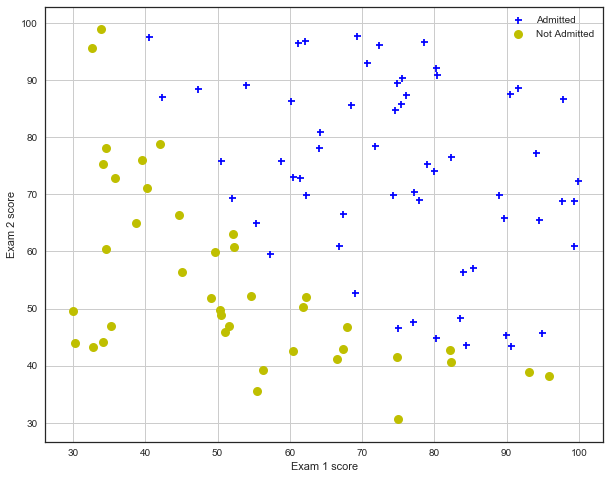

In [29]:
data1 = np.loadtxt('ex2data1.txt', delimiter=',')
X = data1[:,0:2]
y = data1[:,2]
m = X.shape[0]
# print(y[1:5])
X_pos =  np.array([X[i,:] for i in range(m) if y[i] == 1])
X_neg =  np.array([X[i,:] for i in range(m) if y[i] == 0])
assert m == len(X_pos)+len(X_neg)
# print(m,X_pos.shape,X_neg.shape)

### plot data
def plotData():
    plt.figure(figsize=(10,8))
    plt.scatter(X_pos[:,0], X_pos[:,1], c='b', marker='+', label='Admitted', linewidths=2)
    plt.scatter(X_neg[:,0], X_neg[:,1], c='y', marker='o', label='Not Admitted', linewidths=2)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    plt.show()

plotData()

### 1.2 Implementation

### 1.2.1 Warmup exercise: sigmoid function

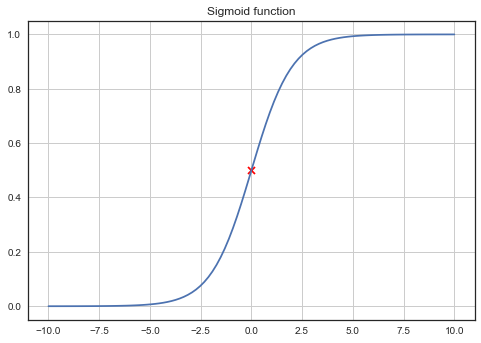

In [43]:
### scalar implementation of sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# builtin vecterized sigmoid function expit in scipy
from scipy.special import expit
# print(expit([[1,2,3],[4,5,6]]))


z = np.linspace(-10,10,100)
plt.grid(True)
plt.plot(z, sigmoid(z), label='Sigmoid')
plt.scatter(0, sigmoid(0), c='r', marker='x')
plt.title('Sigmoid function')
